In [9]:
import random
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.491648,0.801266,0.692920,1.274557,2.260302,1
1,-2.158880,-0.386338,1.970786,1.540697,2.120967,1
2,-2.590203,-0.451716,-0.064565,-2.830883,-0.825604,0
3,-0.071946,2.037684,1.344064,-0.055190,-0.476786,1
4,-0.229463,-0.831192,-3.289703,1.190512,0.735594,0


In [4]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [10]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [11]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [12]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17908\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [15]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17908\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [13]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17908\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [16]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col5', 'target'], dtype='object')
Index(['col4', 'col1', 'target'], dtype='object')
Index(['col4', 'col3', 'target'], dtype='object')


In [17]:
df3

,col4,col3,target
93,-1.212078,0.609691,0
76,1.140745,1.580654,1
30,1.946126,0.334615,1
2,-2.830883,-0.064565,0
31,0.546776,2.266758,1
69,0.277141,-0.059877,1
55,1.641236,-0.024858,1
2,-2.830883,-0.064565,0
22,-1.944318,-0.769755,0
62,-3.288709,2.209776,0


In [19]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [20]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
from sklearn.tree import plot_tree

[Text(0.5833333333333334, 0.9545454545454546, 'x[1] <= 2.807\ngini = 0.48\nsamples = 50\nvalue = [20, 30]'),
 Text(0.5, 0.8636363636363636, 'x[0] <= 0.068\ngini = 0.444\nsamples = 45\nvalue = [15, 30]'),
 Text(0.5416666666666667, 0.9090909090909092, 'True  '),
 Text(0.4166666666666667, 0.7727272727272727, 'x[0] <= -0.153\ngini = 0.469\nsamples = 40\nvalue = [15, 25]'),
 Text(0.3333333333333333, 0.6818181818181818, 'x[1] <= -0.647\ngini = 0.438\nsamples = 37\nvalue = [12, 25]'),
 Text(0.25, 0.5909090909090909, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4166666666666667, 0.5909090909090909, 'x[0] <= -1.36\ngini = 0.408\nsamples = 35\nvalue = [10, 25]'),
 Text(0.25, 0.5, 'x[0] <= -2.447\ngini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(0.16666666666666666, 0.4090909090909091, 'x[0] <= -2.8\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.08333333333333333, 0.3181818181818182, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.3181818181818182, 'gini = 0.0\nsamples =

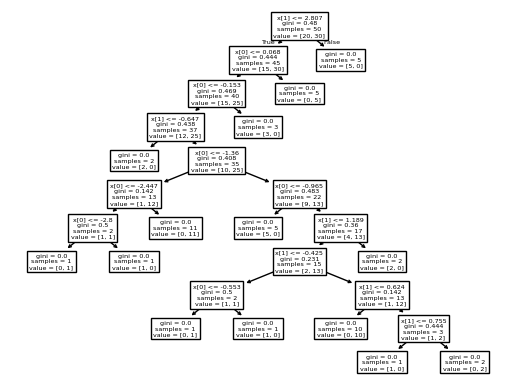

In [22]:
plot_tree(clf1)

[Text(0.4444444444444444, 0.9, 'x[0] <= -0.084\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.38888888888888884, 0.8, 'True  '),
 Text(0.5555555555555556, 0.7, 'x[1] <= 1.118\ngini = 0.305\nsamples = 32\nvalue = [6, 26]'),
 Text(0.5, 0.8, '  False'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 0.277\ngini = 0.137\nsamples = 27\nvalue = [2, 25]'),
 Text(0.2222222222222222, 0.3, 'x[1] <= -0.378\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(0.7777777777777778, 0.5, 'x[0] <= 1.164\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

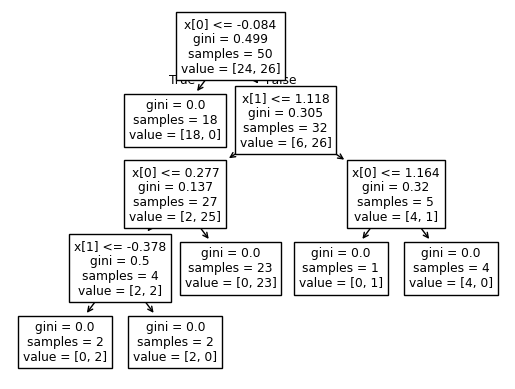

In [23]:
plot_tree(clf2)

[Text(0.4444444444444444, 0.9, 'x[0] <= 0.076\ngini = 0.487\nsamples = 50\nvalue = [29.0, 21.0]'),
 Text(0.2222222222222222, 0.7, 'x[0] <= -0.058\ngini = 0.133\nsamples = 28\nvalue = [26, 2]'),
 Text(0.3333333333333333, 0.8, 'True  '),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.3333333333333333, 0.5, 'x[1] <= -0.679\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2222222222222222, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.7, 'x[1] <= -1.645\ngini = 0.236\nsamples = 22\nvalue = [3, 19]'),
 Text(0.5555555555555556, 0.8, '  False'),
 Text(0.5555555555555556, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7777777777777778, 0.5, 'x[1] <= -0.15\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.6666666666666666, 0.3, 'x[0] <= 1.374\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsam

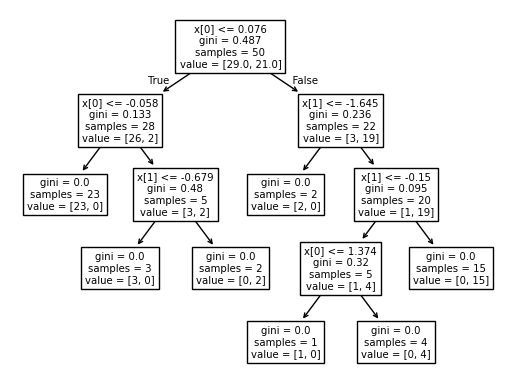

In [24]:
plot_tree(clf3)

In [25]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [26]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [27]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [28]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
65,-2.735510,0.405236,4.281738,-0.061528,2.280056,0
85,0.131892,1.826369,1.384386,1.374462,0.264027,1
14,-1.830716,0.619593,0.257326,1.425669,2.508165,1
12,-0.705218,-2.483056,-2.157885,-0.738764,-0.178343,0
48,-1.054121,-0.775753,0.843318,0.272994,0.742739,0
13,-2.160772,-2.527734,-0.159254,-3.563245,1.489592,0
74,-0.461921,-2.112933,0.709298,-2.514079,-0.520845,0
19,-1.752456,-0.604141,-0.744735,-0.681863,-2.098169,0
60,-1.891802,-0.342318,0.966171,1.342716,1.800943,1
97,0.007025,-0.710926,-1.628037,0.017079,-1.221935,0
